# Homework Assignment 7

In [ ]:
!pip install turicreate
!pip install kaggle 
!pip install gensim
!pip install pyLDAvis
!pip install spaCy
!pip install afinn
!pip install nltk
!pip install plotly_express


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

!python -m spacy download en_core_web_lg # Important! you need to restart runtime after install

**Question 1:** Select two books and construct networks of people and locations, i.e. each link is between a a person and a location (20pt). Visualize the network using Cytoscape or Gephi (20pt).


In [1]:
import numpy as np
import pandas as pd
import nltk
import urllib.request
import re
import pandas as pd
import turicreate as tc
import spacy
from tqdm import tqdm
from collections import defaultdict

# Dorian Gray

In [ ]:

url = "https://www.gutenberg.org/files/174/174-0.txt"
file = urllib.request.urlopen(url)
lines=[]
for line in file:
  decoded_line = re.sub("  "," ",re.sub('[,.!?;]',"",line.decode("utf-8").strip("\r\n"))).replace("'", '').replace('"', '').replace('”', '').replace('“', '')
  lines.append(decoded_line)
print(lines[20:])

['', 'Produced by: Judith Boss HTML version by Al Haines', '', '*** START OF THE PROJECT GUTENBERG EBOOK THE PICTURE OF DORIAN GRAY ***', '', '', '', '', 'The Picture of Dorian Gray', '', 'by Oscar Wilde', '', '', 'Contents', '', ' THE PREFACE', ' CHAPTER I', ' CHAPTER II', ' CHAPTER III', ' CHAPTER IV', ' CHAPTER V', ' CHAPTER VI', ' CHAPTER VII', ' CHAPTER VIII', ' CHAPTER IX', ' CHAPTER X', ' CHAPTER XI', ' CHAPTER XII', ' CHAPTER XIII', ' CHAPTER XIV', ' CHAPTER XV', ' CHAPTER XVI', ' CHAPTER XVII', ' CHAPTER XVIII', ' CHAPTER XIX', ' CHAPTER XX', '', '', '', '', 'THE PREFACE', '', '', 'The artist is the creator of beautiful things To reveal art and', 'conceal the artist is art’s aim The critic is he who can translate', 'into another manner or a new material his impression of beautiful', 'things', '', 'The highest as the lowest form of criticism is a mode of autobiography', 'Those who find ugly meanings in beautiful things are corrupt without', 'being charming This is a fault', '',

In [ ]:
book=[l for l in lines[61:] if l]
book[:10]

['The artist is the creator of beautiful things To reveal art and',
 'conceal the artist is art’s aim The critic is he who can translate',
 'into another manner or a new material his impression of beautiful',
 'things',
 'The highest as the lowest form of criticism is a mode of autobiography',
 'Those who find ugly meanings in beautiful things are corrupt without',
 'being charming This is a fault',
 'Those who find beautiful meanings in beautiful things are the',
 'cultivated For these there is hope They are the elect to whom',
 'beautiful things mean only beauty']

In [ ]:

d=pd.DataFrame(book, columns=["text"])
sf=tc.SFrame(d)
sf

text
The artist is the creatorof beautiful things To ...
conceal the artist isart’s aim The critic is ...
into another manner or anew material his ...
things
The highest as the lowestform of criticism is a ...
Those who find uglymeanings in beautiful ...
being charming This is afault ...
Those who find beautifulmeanings in beautiful ...
cultivated For thesethere is hope They are ...
beautiful things meanonly beauty ...


In [ ]:
nlp = spacy.load('en_core_web_lg')
def get_entites_from_text(text):
    entities_dict= {}
    #using spaCy to get entities
    doc = nlp(text)
    for entity in doc.ents:
        label = entity.label_
        if  label not in entities_dict:
            entities_dict[label] = set()
        entities_dict[label].add(entity.text)        

    return entities_dict



100%|██████████| 7183/7183 [01:13<00:00, 97.54it/s] 


In [ ]:
l =[]
person_set=set()
place_set=set()
people_locations={}
for i in tqdm(range(len(sf["text"]))):
    t = sf[i]['text']
    et=get_entites_from_text(t)
    if et:
      l.append(et)
      if "PERSON" in et.keys():
        p=list(et['PERSON'])[0].split()[0]#keep first name only
        person_set.add(p)
        if "GPE" in et.keys():
          g=list(et["GPE"])[0]
          if p in people_locations.keys():
            people_locations[p][g]+=1
          else:
             people_locations[p]=defaultdict(int)

    if "GPE" in et.keys(): place_set.add(list(et["GPE"])[0])



100%|██████████| 7183/7183 [01:09<00:00, 103.12it/s]


In [ ]:
people_locations

{'Agatha': defaultdict(int, {}),
 'Alan': defaultdict(int, {}),
 'Alfonso': defaultdict(int, {}),
 'Anne': defaultdict(int, {}),
 'Basil': defaultdict(int, {'Paris': 2}),
 'Boniface': defaultdict(int, {}),
 'Caligula': defaultdict(int, {}),
 'Campbell': defaultdict(int, {}),
 'Charles': defaultdict(int, {}),
 'Chopin': defaultdict(int, {}),
 'Churchill': defaultdict(int, {}),
 'Darwinismus': defaultdict(int, {}),
 'Dorian': defaultdict(int, {'Berwick': 1, 'England': 1}),
 'Fermor': defaultdict(int, {}),
 'Filippo': defaultdict(int, {}),
 'Francis': defaultdict(int, {}),
 'Giovanna': defaultdict(int, {}),
 'Gray': defaultdict(int, {}),
 'Hallward': defaultdict(int, {}),
 'Henry': defaultdict(int,
             {'America': 2,
              'Cairo': 1,
              'England': 2,
              'Fin de siêcle': 1,
              'Mayfair': 1,
              'Perth': 1,
              'Waterbury': 1}),
 'Isabella': defaultdict(int, {}),
 'Isotta': defaultdict(int, {}),
 'Leonora': defaultdict(i

In [ ]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

In [ ]:
B = nx.Graph()
edge_list=[]
for p,g_dict in people_locations.items():
  if g_dict:
    for g,w in g_dict.items():
      edge_list.append((p,g,w))
edge_list

[('Dorian', 'Berwick', 1),
 ('Dorian', 'England', 1),
 ('Henry', 'America', 2),
 ('Henry', 'England', 2),
 ('Henry', 'Mayfair', 1),
 ('Henry', 'Cairo', 1),
 ('Henry', 'Perth', 1),
 ('Henry', 'Fin de siêcle', 1),
 ('Henry', 'Waterbury', 1),
 ('Basil', 'Paris', 2)]

In [ ]:
B.add_weighted_edges_from(edge_list)

EdgeView([('Dorian', 'Berwick'), ('Dorian', 'England'), ('England', 'Henry'), ('Henry', 'America'), ('Henry', 'Mayfair'), ('Henry', 'Cairo'), ('Henry', 'Perth'), ('Henry', 'Fin de siêcle'), ('Henry', 'Waterbury'), ('Basil', 'Paris')])

In [ ]:
nx.write_graphml(B,'g.xml')


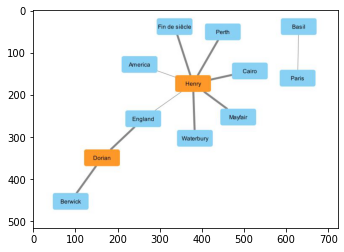

In [ ]:
painting=plt.imread("/content/Capture.JPG")
plt.imshow(painting);

# Sherlock Holmes

In [ ]:
url = "https://www.gutenberg.org/files/1661/1661-0.txt"
file = urllib.request.urlopen(url)
lines=[]
for line in file:
  decoded_line = re.sub("  "," ",re.sub('[,.!?;]',"",line.decode("utf-8").strip("\r\n"))).replace("'", '').replace('"', '').replace('”', '').replace('“', '')
  lines.append(decoded_line)
print(lines[20:])

['', 'Produced by: an anonymous Project Gutenberg volunteer and Jose Menendez', '', '*** START OF THE PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES ***', '', 'cover', '', '', '', '', 'The Adventures of Sherlock Holmes', '', 'by Arthur Conan Doyle', '', '', 'Contents', '', '  I   A Scandal in Bohemia', '  II  The Red-Headed League', '  III  A Case of Identity', '  IV  The Boscombe Valley Mystery', '  V   The Five Orange Pips', '  VI  The Man with the Twisted Lip', '  VII  The Adventure of the Blue Carbuncle', '  VIII The Adventure of the Speckled Band', '  IX  The Adventure of the Engineer’s Thumb', '  X   The Adventure of the Noble Bachelor', '  XI  The Adventure of the Beryl Coronet', '  XII  The Adventure of the Copper Beeches', '', '', '', '', 'I A SCANDAL IN BOHEMIA', '', '', 'I', '', 'To Sherlock Holmes she is always _the_ woman I have seldom heard him', 'mention her under any other name In his eyes she eclipses and', 'predominates the whole of her sex It was not that 

In [ ]:
book=[l for l in lines[58:] if l]
book[:10]

['To Sherlock Holmes she is always _the_ woman I have seldom heard him',
 'mention her under any other name In his eyes she eclipses and',
 'predominates the whole of her sex It was not that he felt any emotion',
 'akin to love for Irene Adler All emotions and that one particularly',
 'were abhorrent to his cold precise but admirably balanced mind He',
 'was I take it the most perfect reasoning and observing machine that',
 'the world has seen but as a lover he would have placed himself in a',
 'false position He never spoke of the softer passions save with a gibe',
 'and a sneer They were admirable things for the observer—excellent for',
 'drawing the veil from men’s motives and actions But for the trained']

In [ ]:
d=pd.DataFrame(book, columns=["text"])
sf=tc.SFrame(d)
sf

text
To Sherlock Holmes she isalways _the_ woman I ...
mention her under anyother name In his eyes ...
predominates the whole ofher sex It was not that ...
akin to love for IreneAdler All emotions and ...
were abhorrent to hiscold precise but ...
was I take it the mostperfect reasoning and ...
the world has seen but asa lover he would have ...
false position He neverspoke of the softer ...
and a sneer They wereadmirable things for the ...
drawing the veil frommen’s motives and act ...


In [ ]:
l =[]
person_set=set()
place_set=set()
people_locations={}
for i in tqdm(range(len(sf["text"]))):
    t = sf[i]['text']
    et=get_entites_from_text(t)
    if et:
      l.append(et)
      if "PERSON" in et.keys():
        p=list(et['PERSON'])[0].split()[0]#keep first name only
        person_set.add(p)
        if "GPE" in et.keys():
          g=list(et["GPE"])[0]
          if p in people_locations.keys():
            people_locations[p][g]+=1
          else:
             people_locations[p]=defaultdict(int)

    if "GPE" in et.keys(): place_set.add(list(et["GPE"])[0])

100%|██████████| 9592/9592 [01:32<00:00, 103.48it/s]


In [ ]:
B = nx.Graph()
edge_list=[]
for p,g_dict in people_locations.items():
  if g_dict:
    for g,w in g_dict.items():
      edge_list.append((p,g,w))
edge_list

[('Holmes', 'India', 1),
 ('Sherlock', 'Berkshire', 1),
 ('Hatty', 'California', 1),
 ('Aloysius', 'Lancaster', 1),
 ('Alice', 'Philadelphia', 1)]

In [ ]:
B.add_weighted_edges_from(edge_list)
nx.write_graphml(B,'g.xml')


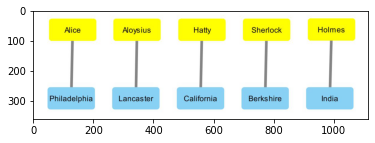

In [ ]:
painting=plt.imread("/content/Capture2.JPG")
plt.imshow(painting);

# Question 2

**Question 2:** Use the [Friends TV Show Transcript](https://www.kaggle.com/ryanstonebraker/friends-transcript)
to create and evaluate a classifier that given a line of text can predict
 who is the "friend" that said it (20pt). Using sentiment analysis identify who are the most and less friendly friends (20pt). Construct a classifier that can be given several text lines (quotes) from a specific episode that will predict the episode's season number (20pt).

In [2]:
#setting up Kaggle & TuriCreate package s
import json
import os

!mkdir /root/.kaggle/
# Installing the Kaggle package

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"amirbialer","key":"f2af62d43f0aaf0ee3bea5998634a1b7"}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [3]:
!mkdir ./datasets
!mkdir ./datasets/friends

# download the dataset from Kaggle and unzip it
!kaggle datasets download -d ryanstonebraker/friends-transcript -p ./datasets/friends
!unzip ./datasets/friends/*.zip  -d ./datasets/friends/

mkdir: cannot create directory ‘./datasets’: File exists
mkdir: cannot create directory ‘./datasets/friends’: File exists
friends-transcript.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./datasets/friends/friends-transcript.zip
replace ./datasets/friends/friends_quotes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [4]:
df=pd.read_csv("/content/datasets/friends/friends_quotes.csv")

In [5]:
sf=tc.SFrame(df)

In [9]:
from nltk.stem.porter import *

In [7]:
import gensim.downloader as api

#loading Twitter pretrained model
model = api.load("glove-twitter-100")

[==================================================] 100.0% 387.1/387.1MB downloaded


In [8]:
from nltk.tokenize import word_tokenize
import numpy as np

def txt2vector(txt):
    words = word_tokenize(txt)
    words = [w for w in words if w in model]
    if len(words) != 0:
        return np.mean([model[w] for w in words], axis=0)
    return np.zeros((100,1))


In [9]:
vectors =sf["quote"].apply(txt2vector)

In [25]:
vector_np=np.array([v.flatten() for v in vectors])

In [27]:
df_vectors=pd.DataFrame(vector_np)
sf_vectors=tc.SFrame(df_vectors)
sf_vectors["author"]=sf["author"]

In [40]:
friends=["Monica", "Phoebe", "Ross", "Joey","Chandler", "Rachel"]
df.loc[df["author"].isin(friends)]["author"].unique()

array(['Monica', 'Joey', 'Chandler', 'Phoebe', 'Ross', 'Rachel'],
      dtype=object)

#Predict speaker

In [32]:
features=[str(c) for c in sf_vectors.column_names()[:-1]]

In [46]:
sf1=tc.SFrame(sf_vectors.to_dataframe()[df["author"].isin(friends)])
train, test = sf1.random_split(0.8)
cls = tc.classifier.create(train, features=features, target="author")

/usr/local/lib/python3.7/dist-packages/turicreate/data_structures/sframe.py:2592: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = list(self[column_name])


PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 34578

Number of classes           : 6

Number of feature columns   : 100

Number of unpacked features : 100

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 1.165812     | 0.264735          | 0.195604            | 1.770003          | 1.787560            |

| 2         | 2.351358     | 0.296489          | 0.200000            | 1.750459          | 1.786130            |

| 3         | 3.530254     | 0.318237          | 0.212088            | 1.732939          | 1.782082            |

| 4         | 4.672311     | 0.339696          | 0.201099            | 1.715763          | 1.782143            |

| 5         | 5.823331     | 0.358985          | 0.212637            | 1.697207          | 1.781747            |

| 10        | 11.542389    | 0.414020          | 0.199451            | 1.632513          | 1.784831            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 34578

Number of classes           : 6

Number of feature columns   : 100

Number of unpacked features : 100

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.950667     | 0.256290          | 0.181868            | 1.741410          | 1.799113            |

| 2         | 1.904480     | 0.284979          | 0.204945            | 1.732257          | 1.785834            |

| 3         | 2.874749     | 0.300740          | 0.192308            | 1.728469          | 1.783024            |

| 4         | 3.803377     | 0.314593          | 0.200549            | 1.727495          | 1.780961            |

| 5         | 4.747867     | 0.324108          | 0.203297            | 1.726691          | 1.778903            |

| 10        | 9.570729     | 0.350281          | 0.210989            | 1.724552          | 1.778885            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 34578

Number of classes           : 6

Number of feature columns   : 100

Number of unpacked features : 100

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 1.213468     | 0.264735          | 0.195604            | 1.734366          | 1.791997            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 34578

Number of classes           : 6

Number of feature columns   : 100

Number of unpacked features : 100

Number of coefficients      : 505

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 0.500000  | 0.312541     | 0.182891          | 0.188462            |

| 1         | 5        | 0.500000  | 0.620153     | 0.184163          | 0.189560            |

| 2         | 7        | 0.500000  | 0.925159     | 0.188415          | 0.191758            |

| 3         | 8        | 0.625000  | 1.138051     | 0.204089          | 0.192857            |

| 4         | 9        | 0.781250  | 1.343887     | 0.208398          | 0.198901            |

| 9         | 17       | 1.095060  | 2.699097     | 0.220545          | 0.204945            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.19945054945054946
PROGRESS: RandomForestClassifier          : 0.210989010989011
PROGRESS: DecisionTreeClassifier          : 0.1956043956043956
PROGRESS: LogisticClassifier              : 0.20494505494505494
PROGRESS: ---------------------------------------------
PROGRESS: Selecting RandomForestClassifier based on validation set performance.


In [47]:
cls.evaluate(test)

{'accuracy': 0.21014971378247468,
 'auc': 0.5544556800074155,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 36
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |    Phoebe    |      Rachel     |  407  |
 |    Rachel    |      Monica     |  240  |
 |     Ross     |       Joey      |  253  |
 |    Rachel    |      Rachel     |  599  |
 |     Joey     |      Rachel     |  412  |
 |    Monica    |      Phoebe     |   38  |
 |     Ross     |      Rachel     |  492  |
 |   Chandler   |      Monica     |  235  |
 |     Ross     |     Chandler    |  201  |
 |     Ross     |      Monica     |  225  |
 +--------------+-----------------+-------+
 [36 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.19093590952890951,
 'log_loss': 1.778581873022031

# Average Sentiment analysis

In [52]:
import textblob
from textblob import TextBlob
sf1=sf[["quote","author"]]
sf1["textblob"]=sf1["quote"].apply(lambda x: TextBlob(x).sentiment.polarity)

In [54]:
sf2=tc.SFrame(sf1.to_dataframe()[df["author"].isin(friends)])


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

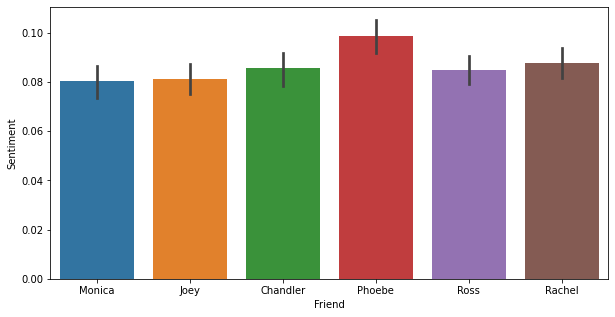

In [57]:
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=sf2.to_dataframe(),x="author",y="textblob", ax=ax);
ax.set_xlabel("Friend");
ax.set_ylabel("Sentiment");

# Classify Season

In [62]:
sf_vectors["season"]=sf["season"].astype(str)
sf1=tc.SFrame(sf_vectors.to_dataframe()[df["author"].isin(friends)])
train, test = sf1.random_split(0.8)
cls = tc.classifier.create(train, features=features, target="season")

/usr/local/lib/python3.7/dist-packages/turicreate/data_structures/sframe.py:2592: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = list(self[column_name])


PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 34594

Number of classes           : 10

Number of feature columns   : 100

Number of unpacked features : 100

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 1.917724     | 0.232063          | 0.161450            | 2.239298          | 2.272227            |

| 2         | 3.833794     | 0.274585          | 0.171334            | 2.184271          | 2.248837            |

| 3         | 5.824898     | 0.301266          | 0.165294            | 2.137614          | 2.231246            |

| 4         | 7.764423     | 0.325056          | 0.171884            | 2.095028          | 2.217139            |

| 5         | 9.733958     | 0.347979          | 0.168589            | 2.054528          | 2.209113            |

| 10        | 19.419832    | 0.427213          | 0.181219            | 1.904113          | 2.176510            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 34594

Number of classes           : 10

Number of feature columns   : 100

Number of unpacked features : 100

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 1.595732     | 0.222091          | 0.154860            | 2.148488          | 2.254781            |

| 2         | 3.207346     | 0.256808          | 0.170236            | 2.128168          | 2.226582            |

| 3         | 4.749596     | 0.278054          | 0.170236            | 2.120714          | 2.221230            |

| 4         | 6.325037     | 0.295543          | 0.176826            | 2.118350          | 2.215989            |

| 5         | 7.921743     | 0.306787          | 0.187260            | 2.116430          | 2.215197            |

| 10        | 15.728745    | 0.337313          | 0.187260            | 2.113302          | 2.215233            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 34594

Number of classes           : 10

Number of feature columns   : 100

Number of unpacked features : 100

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 1.956893     | 0.232063          | 0.161450            | 2.137947          | 2.246938            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 34594

Number of classes           : 10

Number of feature columns   : 100

Number of unpacked features : 100

Number of coefficients      : 909

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.213529     | 0.131873          | 0.127403            |

| 1         | 4        | 1.000000  | 0.510896     | 0.162658          | 0.159253            |

| 2         | 5        | 1.000000  | 0.719104     | 0.165607          | 0.163646            |

| 3         | 6        | 1.000000  | 0.931943     | 0.172140          | 0.164195            |

| 4         | 7        | 1.000000  | 1.132397     | 0.173123          | 0.164745            |

| 9         | 17       | 1.000000  | 2.705982     | 0.177141          | 0.160901            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.1812191103789127
PROGRESS: RandomForestClassifier          : 0.1872597473915431
PROGRESS: DecisionTreeClassifier          : 0.1614497528830313
PROGRESS: LogisticClassifier              : 0.16090060406370127
PROGRESS: ---------------------------------------------
PROGRESS: Selecting RandomForestClassifier based on validation set performance.


In [63]:
cls.evaluate(test)

{'accuracy': 0.17657439064740266,
 'auc': 0.5982079223166754,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 92
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      5       |        4        |   39  |
 |      6       |        4        |   37  |
 |      3       |        5        |  124  |
 |      3       |        3        |  341  |
 |      4       |        7        |  135  |
 |      2       |        8        |   6   |
 |      3       |        9        |   93  |
 |      3       |        10       |   36  |
 |      4       |        4        |   53  |
 |      5       |        8        |   83  |
 +--------------+-----------------+-------+
 [92 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.15171119288725568,
 'log_loss': 2.214247322378314